In [1]:
import cv2
import glob
import os
import numpy as np

SIZE = 224 #Resize images

#Capture training data and labels into respective lists
dataset = []
labels = []
count = 0

for directory_path in glob.glob("/kaggle/input/terminate/multiclass/*"):
    label =  os.path.basename(directory_path)
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):

      img = cv2.imread(img_path, cv2.IMREAD_COLOR)

      if img is not None:
        img = cv2.resize(img, (SIZE, SIZE),interpolation=cv2.INTER_AREA)
        dataset.append(img)
        labels.append(label)

      else:
        continue

# #Convert lists to arrays
dataset = np.array(dataset)
labels = np.array(labels)

print('\nThe shape of images dataset : ',dataset.shape)
print("The shape of images labels : ",labels.shape)

Cloudy
snow
Rain
lightning
Shine

The shape of images dataset :  (1327, 224, 224, 3)
The shape of images labels :  (1327,)


In [2]:
import cv2          # Importing the OpenCV library for image processing
import glob         # For retrieving file paths that match a specified pattern
import os           # For operating system related functionalities
import numpy as np  # For numerical operations on arrays
from keras.preprocessing.image import ImageDataGenerator  # Importing the ImageDataGenerator from Keras

import warnings
warnings.filterwarnings("ignore")

SIZE = 224  # Resize images
SCALE = 1 / 255.0  # Scale factor for rescaling

num_augmentations  = 3 # Number of augmented images per original image

# Example augmentations:

# Define augmentation parameters
datagen = ImageDataGenerator(

          # Add desired augmentations here
          rotation_range=45,       # Random rotation between 0 and 45 degrees
          width_shift_range=0.2,   # Random horizontal shift of up to 20% of the image width
          height_shift_range=0.2,  # Random vertical shift of up to 20% of the image height
          shear_range=0.2,         # Random shearing transformation
          zoom_range=0.2,          # Random zoom between 80% and 120% of original size
          horizontal_flip=True,    # Randomly flip the images horizontally
          fill_mode='reflect')     # Strategy for filling in newly created pixels after rotation or shifting

# Capture training data and labels into respective lists
dataset = []  # List to store augmented images
labels = []   # List to store corresponding labels

for directory_path in glob.glob("/kaggle/input/terminate/multiclass/*"):
    label = os.path.basename(directory_path)    # Extracting the label from the directory path
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)        # Read the image using OpenCV
        if img is not None:      # Ensure the image is successfully read
            img = cv2.resize(img, (SIZE, SIZE), interpolation=cv2.INTER_AREA)  # Resize the image
            img = img * SCALE    # Rescale the image

            augmented_images = datagen.flow(np.expand_dims(img, axis=0), batch_size=1)  # Generate augmented images

            for _ in range(num_augmentations):              # Generate 5 augmented images per original image
                augmented_img = augmented_images.next()[0]  # Retrieve the augmented image
                dataset.append(augmented_img)               # Add the augmented image to the dataset list
                labels.append(label)                        # Add the corresponding label to the labels list

        else:
            continue

# Convert lists to arrays
dataset = np.array(dataset)  # Convert the dataset list to a NumPy array
labels = np.array(labels)    # Convert the labels list to a NumPy array

print('\nThe shape of images dataset after augmentation:', dataset.shape)   # Print the shape of the dataset
print('The shape of images labels after augmentation:', labels.shape)       # Print the shape of the labels





/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Cloudy
snow
Rain
lightning
Shine

The shape of images dataset after augmentation: (3981, 224, 224, 3)
The shape of images labels after augmentation: (3981,)


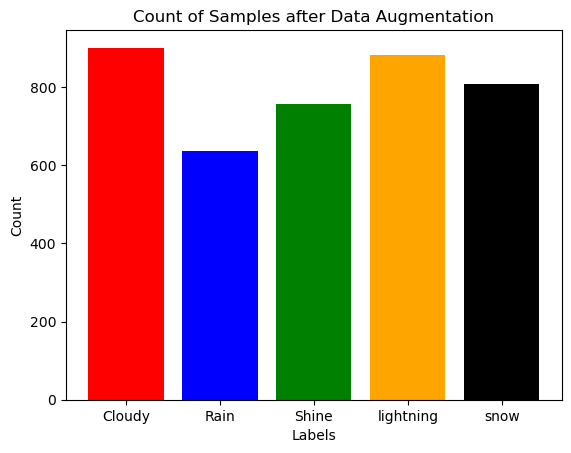

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = np.unique(labels, return_counts=True)

# Extract the unique labels and their corresponding counts
unique_labels = label_counts[0]
label_counts = label_counts[1]

# Calculate the percentage of each label
label_percentages = (label_counts / len(labels)) * 100

# Define colors for each label
colors = ['red', 'blue', 'green', 'orange','black']

# Create a bar plot with different colors for each label
plt.bar(unique_labels, label_counts, color=colors)

# # Display the percentage on top of each bar
# for i, count in enumerate(label_counts):
#     percentage = label_percentages[i]
#     plt.text(unique_labels[i], count, f'{percentage:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Samples after Data Augmentation')

# Display the plot
plt.show()


In [4]:
from sklearn.utils import shuffle

# Assuming having features (X) and labels (y) arrays
X, y = shuffle(dataset, labels, random_state=42)

split_ratio = 0.8  # Specify the desired split ratio
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# encode labels from text to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
le.fit(y_test)

y_train = le.transform(y_train)
y_test = le.transform(y_test)


# One Hot Encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



print(f'{X_train.shape[0]} samples for training.')
print(f'{X_test.shape[0]} samples for testing.')

3184 samples for training.
797 samples for testing.


In [5]:
#Load model without classifier/fully connected layers

from keras.applications.vgg16 import VGG16

VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights

# the fine_tune variable is to unfreeze the last layers during training.
fine_tune = 0

# here i am not unfreezing the last layer but you can unfreeze it when it required.
if fine_tune > 0:
        for layer in VGG_model.layers[:-fine_tune]:
            layer.trainable = False
else:
    for layer in VGG_model.layers:
        layer.trainable = False

VGG_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [6]:
from keras import backend as k
from keras.models import Model
from keras.layers import Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras import optimizers

k.clear_session() # clear model number


# Create a new 'top' of the model (i.e. fully-connected layers).

# This is 'bootstrapping' a new top_model onto the pretrained layers.

n_classes = 5 # no of output classes

# sequential keras model and just two dense layer, two BatchNormalization layer
# and two dropout layer.

VGG16_base = VGG_model.output
flatten = Flatten(name="flatten")(VGG16_base)

dense1 = Dense(512, activation='relu')(flatten)
BatchNorm1 = BatchNormalization(axis = -1)(dense1)
dropout1 = Dropout(0.5)(BatchNorm1)

dense2 = Dense(256, activation='relu')(dropout1)
BatchNorm2 = BatchNormalization(axis = -1)(dense2)
dropout2 = Dropout(0.2)(BatchNorm2)


output_layer = Dense(n_classes, activation='softmax')(dropout2)

# Group the convolutional base and new fully-connected layers into a Model object.
model = Model(inputs=VGG_model.input, outputs=output_layer)
learning_rate = 0.00001  # Specify your desired learning rate

optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



# Check model summary
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
history= model.fit(X_train,
                  y_train,
                  validation_split=0.1,
#                   steps_per_epoch=2540/64,
                  batch_size=64,
                  epochs=100,
          )

Epoch 1/100
45/45 [==============================] - 44s 617ms/step - loss: 1.6722 - accuracy: 0.3986 - val_loss: 1.3619 - val_accuracy: 0.3793
Epoch 2/100
45/45 [==============================] - 14s 303ms/step - loss: 0.9776 - accuracy: 0.6356 - val_loss: 1.1024 - val_accuracy: 0.5956
Epoch 3/100
45/45 [==============================] - 14s 306ms/step - loss: 0.7131 - accuracy: 0.7431 - val_loss: 0.8980 - val_accuracy: 0.6897
Epoch 4/100
45/45 [==============================] - 14s 314ms/step - loss: 0.5984 - accuracy: 0.7780 - val_loss: 0.7386 - val_accuracy: 0.7618
Epoch 5/100
45/45 [==============================] - 14s 322ms/step - loss: 0.5245 - accuracy: 0.8154 - val_loss: 0.6150 - val_accuracy: 0.8025
Epoch 6/100
45/45 [==============================] - 15s 329ms/step - loss: 0.4282 - accuracy: 0.8447 - val_loss: 0.5207 - val_accuracy: 0.8245
Epoch 7/100
45/45 [==============================] - 14s 323ms/step - loss: 0.4103 - accuracy: 0.8471 - val_loss: 0.4566 - val_accuracy:

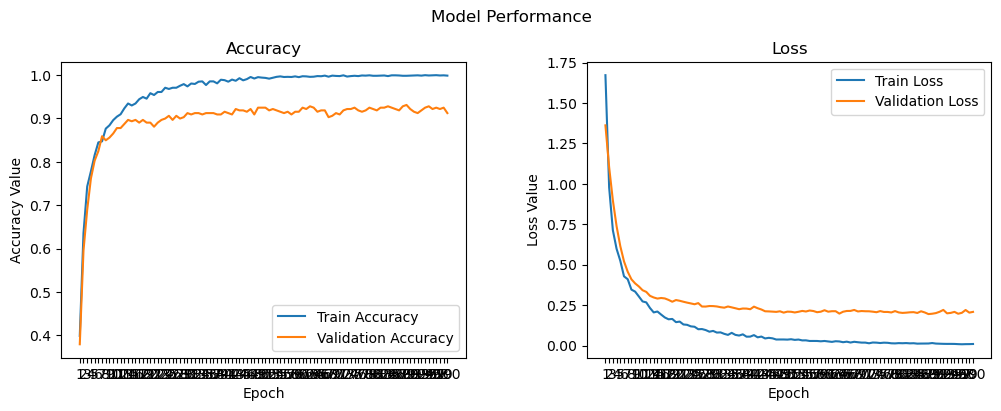

In [8]:
from matplotlib import pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [9]:
# Accuracy calculation
# Calculate the accuracy on the test data.

print("Test_Accuracy: {:.2f}%".format(model.evaluate(X_test, y_test)[1]*100))

25/25 [==============================] - 12s 308ms/step - loss: 0.2419 - accuracy: 0.9285
Test_Accuracy: 92.85%


In [10]:
import pickle
#pickle.dump(model2, open(weather_model.pkl,'wb'))
with open('weather_model.pkl','wb') as f:
  pickle.dump(model,f)

In [11]:
model = pickle.load(open('weather_model.pkl', 'rb'))
image_file = open('/kaggle/input/terminate/multiclass/snow/0834.jpg')
SCALE=1/255
# Read and preprocess the image
image = cv2.imread('/kaggle/input/terminate/multiclass/snow/0834.jpg', cv2.IMREAD_COLOR)
image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
image = image * SCALE
image = np.expand_dims(image, axis=0)

# Make predictions
predictions = model.predict(image)
predicted_class = np.argmax(predictions)

# Get the predicted class name based on the label
class_names = ['cloudy', 'Rain', 'Sunny', 'lightning', 'snow']  # Replace with your actual class names
predicted_class_name = class_names[predicted_class]
predicted_class_name

1/1 [==============================] - 1s 844ms/step


'snow'

In [12]:
model.save('modell_output')

In [13]:
import shutil
shutil.make_archive('/content/modell', 'zip', '/content/modell_output')

'/content/modell.zip'

In [14]:
 labels={0:'Cloudy',1:'snow',2:'Rain',3:'Lightning',4:'Shine'}

25/25 [==============================] - 3s 129ms/step


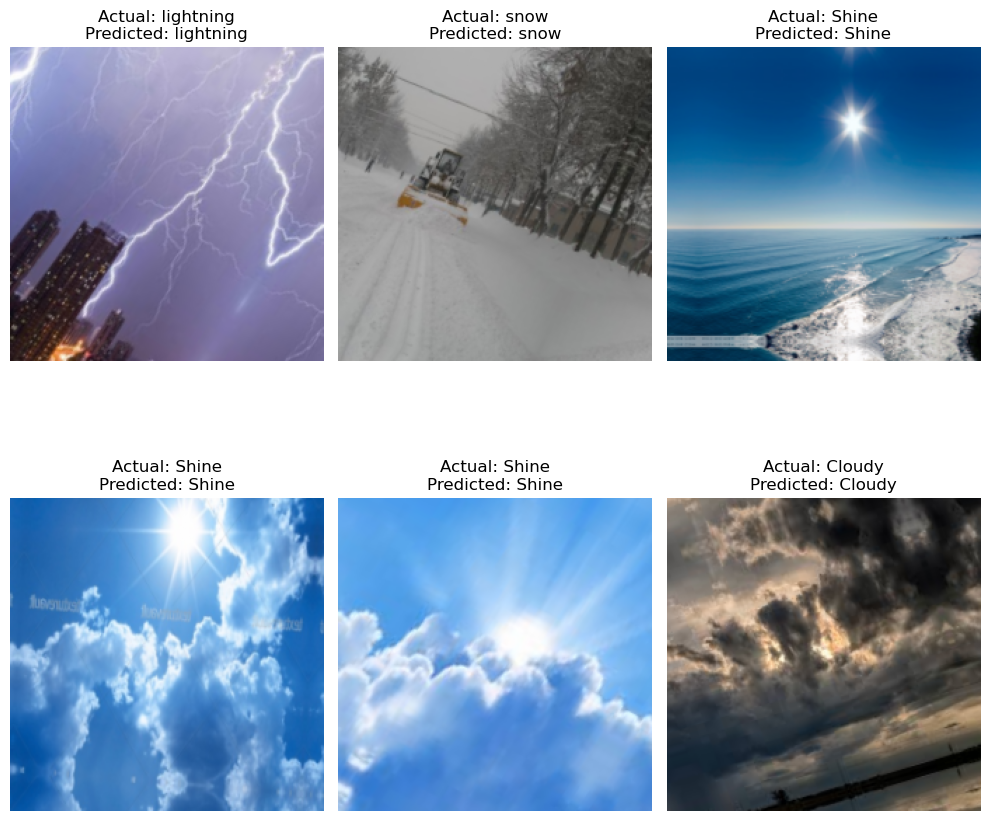

In [15]:
# Let’s show some good predictions from transfer model.

import numpy as np
import matplotlib.pyplot as plt

# predict the labels agianst x_test
y_predict = model.predict(X_test)

# Reverse label encoding
reverse_encoded_labels = le.inverse_transform(np.argmax(y_test, axis=1))

# Reverse one-hot encoding for predicted labels
reverse_predicted_labels = le.inverse_transform(np.argmax(y_predict, axis=1))

# Plotting images with labels
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# Convert BGR image to RGB

for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB))
    ax.set_title(f'Actual: {reverse_encoded_labels[i]}\nPredicted: {reverse_predicted_labels[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [16]:
from tensorflow.keras.preprocessing import image



def prediction(path_image):

  img = image.load_img(path_image , target_size = (250 , 250))
  img = image.img_to_array(img, dtype=np.uint8)
  img = np.array(img)/255.0

  # plt.title('Image')
  plt.axis('off')
  plt.imshow(img.squeeze())

  predict = model.predict(img[np.newaxis , ...])
  predicted_class = labels[np.argmax(predict[0] , axis = -1)]

  print('Prediction Value: ' , np.max(predict[0] , axis = -1))
  print("Classified:",predicted_class)

1/1 [==============================] - 1s 991ms/step
Prediction Value:  0.9994765
Classified: Cloudy


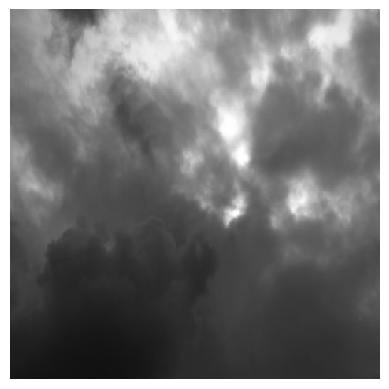

In [17]:
prediction('/kaggle/input/terminate/multiclass/Cloudy/cloudy1.jpg')

1/1 [==============================] - 0s 33ms/step
Prediction Value:  0.99767023
Classified: Cloudy


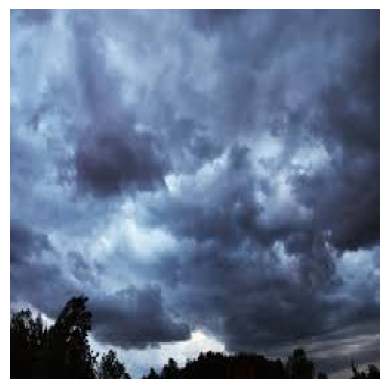

In [18]:
prediction('/kaggle/input/terminate/multiclass/Cloudy/cloudy104.jpg')

1/1 [==============================] - 0s 27ms/step
Prediction Value:  0.8849164
Classified: Cloudy


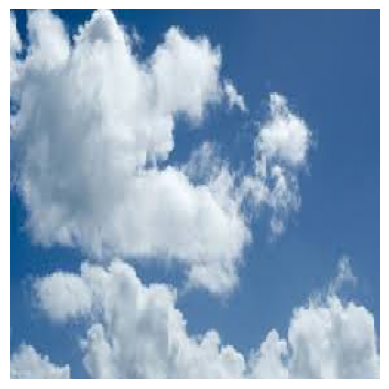

In [19]:
prediction('/kaggle/input/terminate/multiclass/Cloudy/cloudy110.jpg')

1/1 [==============================] - 0s 21ms/step
Prediction Value:  0.87967056
Classified: Cloudy


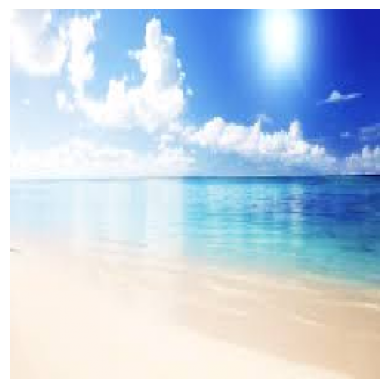

In [20]:
prediction('/kaggle/input/terminate/multiclass/Shine/shine104.jpg')

1/1 [==============================] - 0s 21ms/step
Prediction Value:  0.86068213
Classified: Rain


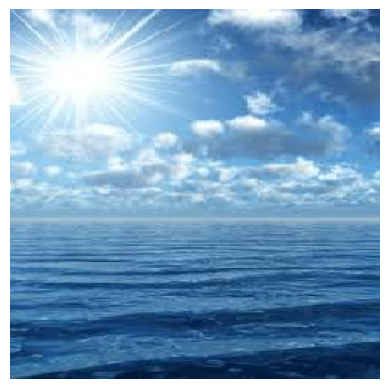

In [21]:
prediction('/kaggle/input/terminate/multiclass/Shine/shine11.jpg')

1/1 [==============================] - 0s 25ms/step
Prediction Value:  0.99995136
Classified: Lightning


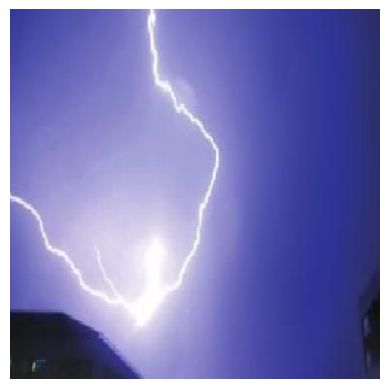

In [22]:
prediction('/kaggle/input/terminate/multiclass/lightning/1834.jpg')

In [23]:
from tensorflow import keras

# Assuming you have a trained model object named 'model'
# Save the model to an .h5 file
model.save('weather_dl_model.h5')
